In [3]:
! pip install mlxtend

  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)


In [10]:

import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns 
import matplotlib.pyplot as plt


In [55]:
# aplha formula
def alpha(error:int)->float:
    return 0.5*(np.log((1-error)/(error + 0.0000001)))





In [5]:
df = pd.DataFrame()
     
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

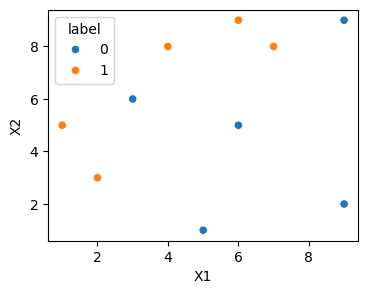

In [34]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [15]:
df['weight']=1/df.shape[0]
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [22]:
X=df.iloc[:,:2].values
y=df.iloc[:,2].values

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt1=DecisionTreeClassifier(max_depth=1)
dt1.fit(X,y)
df['y_pred']=dt1.predict(X)
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

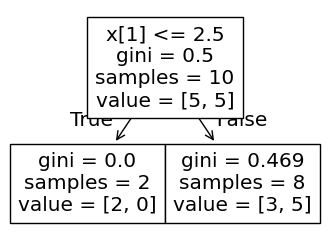

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(4,3))
plot_tree(dt1)

<Axes: >

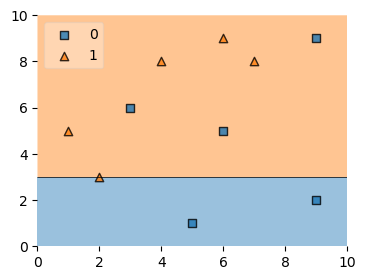

In [33]:
plt.figure(figsize=(4,3))
plot_decision_regions(X, y, clf=dt1, legend=2)

In [58]:
# Error
e1=sum((abs(df['label']-df['y_pred'])))/df.shape[0]
# Aplha
alpha1=alpha(error=e1)
print(f"Alpha value: {alpha1}")

def row_update(row,alpha=0.4236487635269629):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)
df['Updated_weight']=df.apply(row_update,axis=1)
df['normalized_updated_weight']=df['Updated_weight']/sum(df['Updated_weight'])
df


Alpha value: 0.4236487635269629


,X1,X2,label,weight,y_pred,Updated_weight,normalized_updated_weight
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152752,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152752,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152752,0.166667
9,9,2,0,0.1,0,0.065465,0.071429


In [61]:
# defining the range
df['cumsum_upper']=np.cumsum(df['normalized_updated_weight'])
df['cumsum_lower']=df['cumsum_upper']-df['normalized_updated_weight']

df

,X1,X2,label,weight,y_pred,Updated_weight,normalized_updated_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,1,0.152752,0.166667,0.309524,0.142857
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,1,0.065465,0.071429,0.523810,0.452381
6,6,5,0,0.1,1,0.152752,0.166667,0.690476,0.523810
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152752,0.166667,0.928571,0.761905
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [75]:
def Create_new_dataset(updated_df):
    indices=[]
    for _ in range(df.shape[0]):
        a=np.random.random()
        for index , row in df.iterrows():
            if row['cumsum_upper'] >a and row['cumsum_lower']<a:
                indices.append(index)
    return indices


new_rows=Create_new_dataset(df)
print(f"After upsampling: {new_rows}")


After upsampling: [5, 4, 5, 8, 9, 8, 2, 2, 6, 6]


## Repeat this as per the number of estimators